# Importing packages

In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

# Importing Data

In [8]:
np.random.seed(1)
num_samples= 100

# Featues
sq_ft=np.random.randint(1000,10000,num_samples)
num_rooms=np.random.randint(2,10,num_samples)
age=np.random.randint(0,10,num_samples)
house_price=(50+0.2*sq_ft+10*num_rooms-1*age+np.random.randn(num_samples)*10) # this is simulation
df=pd.DataFrame({'sq':sq_ft,'num_of_rooms':num_rooms,"age_of_building":age,"pruchase_price": house_price})
df

,sq,num_of_rooms,age_of_building,pruchase_price
0,1235,6,7,354.952113
1,6192,6,2,1344.652968
2,1905,9,8,522.863352
3,8813,4,3,1851.735339
4,3895,4,0,890.906997
...,...,...,...,...
95,1489,5,5,386.730016
96,1152,2,9,292.462227
97,4410,8,4,992.743197
98,5979,2,9,1264.750261


# Exploratory data analysis

In [10]:
df.shape

(100, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sq               100 non-null    int32  
 1   num_of_rooms     100 non-null    int32  
 2   age_of_building  100 non-null    int32  
 3   pruchase_price   100 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 2.1 KB


In [13]:
df.describe()

,sq,num_of_rooms,age_of_building,pruchase_price
count,100.00000,100.000000,100.000000,100.000000
mean,4767.34000,5.500000,4.470000,1055.022069
std,2698.03243,2.341975,2.854927,539.580914
min,1015.00000,2.000000,0.000000,288.330833
25%,2283.00000,3.000000,2.000000,560.959535
50%,4419.00000,6.000000,4.500000,989.288409
75%,7146.00000,7.000000,7.000000,1515.897811
max,9920.00000,9.000000,9.000000,2055.023193


In [15]:
df.isnull().sum()

sq                 0
num_of_rooms       0
age_of_building    0
pruchase_price     0
dtype: int64

In [16]:
df.head(5)

,sq,num_of_rooms,age_of_building,pruchase_price
0,1235,6,7,354.952113
1,6192,6,2,1344.652968
2,1905,9,8,522.863352
3,8813,4,3,1851.735339
4,3895,4,0,890.906997


# Declare feature vector and target variable

In [21]:
x=df[['sq']]
y=df[['pruchase_price']]

# Split data into separate training and test set

In [44]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)

In [45]:
x_train

,sq
11,6374
47,8906
85,7713
28,5415
93,9798
...,...
60,5039
71,1461
14,9444
92,4212


# Model training

In [104]:
l=LR()
# traning data
l.fit(x_train,y_train)
ypred_train=l.predict(x_train)

# test dat

l.fit(x_test,y_test)
ypred_test=l.predict(x_test)


In [105]:
print(f"Intercept {l.intercept_}")
print(f"co-efficent {l.coef_}")



Intercept [97.05196205]
co-efficent [[0.20093855]]


# ploting the Graph

### ploting the graph for train data

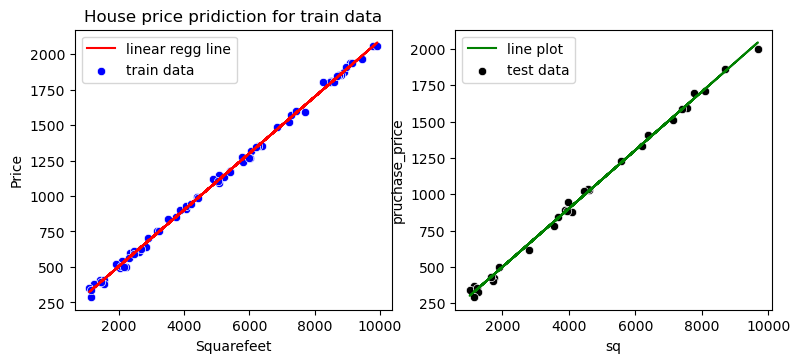

In [106]:
plt.figure(figsize=(9,8))
plt.subplot(2,2,1)
plt.plot(x_train,ypred_train,color="red",label="linear regg line")
sns.scatterplot(x=x_train['sq'],y=y_train['pruchase_price'],color='blue',label="train data")
plt.xlabel("Squarefeet")
plt.ylabel("Price")
plt.title("House price pridiction for train data")

plt.subplot(2,2,2)
plt.plot(x_test,ypred_test,color="green",label="line plot")
sns.scatterplot(x=x_test['sq'],y=y_test['pruchase_price'],color='black',label="test data")

plt.show()




### metrics

In [107]:
mse_train=mse(x_train,ypred_train)
mse_train

19388507.89033105

In [109]:
mse_test=mse(x_test,ypred_test)
mse_test

16079855.20462132

# Predict results 

In [112]:
l.predict([[300]])

C:\Program Files\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[157.33352758]])